In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, initializers
from PIL import Image
from skimage.color import hsv2rgb

In [3]:
def cppn_model(variance, bw=True, depth=32):
  input_shape=(4, )
  init=initializers.VarianceScaling(scale=variance)

  model=models.Sequential()
  model.add(layers.Dense(units=depth, activation='tanh', kernel_initializer=init, input_shape=input_shape))
  model.add(layers.Dense(units=depth, activation='tanh', kernel_initializer=init))
  model.add(layers.Dense(units=depth, activation='tanh', kernel_initializer=init))

  model.add(layers.Dense(1 if bw else 3, activation=tf.nn.sigmoid))

  model.compile(optimizer='rmsprop', loss='mse')
  return model


In [4]:
def coordinates(x_dim, y_dim, scale=1.0):
  N=np.mean((x_dim, y_dim))

  x=np.linspace(-x_dim/N *scale, x_dim/N *scale, x_dim)
  y=np.linspace(-y_dim/N *scale, y_dim/N *scale, y_dim)

  X, Y=np.meshgrid(x, y)
  
  x=np.ravel(X).reshape(-1, 1)
  y=np.ravel(Y).reshape(-1, 1)
  r=np.sqrt(x**2+y**2)

  return x, y, r

In [26]:
def create_image(model, x, x_dim, y, y_dim, r, z):
  Z=np.repeat(z, x.shape[0]).reshape(-1, x.shape[0])
  X=np.concatenate([x, y, r, Z.T], axis=1)

  pred=model.predict(X)

  img=[]
  channels=pred.shape[1]

  for channel in range(channels):
    yp=pred[:, channel]
    yp=(yp-yp.min())/(yp.max()-yp.min())
    img.append(yp.reshape(y_dim, x_dim))

  img=np.dstack(img)

  if channels == 3: img = hsv2rgb(img)
  img=(img*255).astype(np.uint8)

  return img

In [13]:
x_dim=1800
y_dim=1800
scale=10

In [29]:
x, y, r=coordinates(x_dim, y_dim, scale)
variance=np.random.uniform(50, 150)
model=cppn_model(variance, False, 32)
z=np.random.normal(0,1,1)
image=create_image(model, x, x_dim, y, y_dim, r, z)


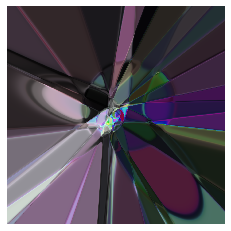

In [30]:

plt.figure()
plt.imshow(image, interpolation='nearest')
plt.axis('off')
plt.show()